<a href="https://colab.research.google.com/github/X4D0/DataVisualization/blob/main/Assignment3_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rayhan Rahmanda - 1301184233
## Introduction

Pada sesi lab kali ini kita akan membahas tentang visualisasi untuk topik sains. Lebih spesifiknya kita akan belajar tentang masalah Persamaan Kalor, cara memvisualisasikan persamaan kalor pada 2D dan 3D, serta cara merender kumpulan gambar menjadi video.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Persamaan kalor<br>
2. Visualisasi 2D dari Persamaan Kalor<br>
3. Visualisasi 3D dari Persamaan Kalor <br>
4. Rendering Gambar ke Video <br>
</div>
<hr>

## Persamaan Kalor

Persamaan Kalor adalah persamaan *partial differential equation* (PDE) yang menggambarkan distribusi panas (atau variasi suhu) dalam suatu
wilayah dari waktu ke waktu. Untuk pemahaman yang lebih baik, sangat penting bagi kita untuk memahami perbedaan antara panas dan suhu.

Kalor adalah proses perpindahan energi akibat perbedaan suhu antara dua titik. Jadi, istilah 'kalor' digunakan untuk menggambarkan energi yang ditransfer melalui proses pemanasan. Temperatur, di sisi lain, adalah properti fisik materi yang menggambarkan panas atau dinginnya suatu objek atau lingkungan. Oleh karena itu, tidak ada panas yang akan ditukar antara benda-benda dengan suhu yang sama.

Persamaan Kalor adalah persamaan diferensial parsial parabola yang menggambarkan distribusi kalor/panas (atau variasi suhu) di suatu wilayah dari waktu ke waktu. Untuk fungsi (x, y, z, t) dari tiga variabel spasial (x, y, z) (lihat koordinat Kartesius) dan variabel waktu t, persamaan kalornya adalah:

\begin{equation*}
    \frac{\partial u}{\partial t} - \alpha \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} \right) = 0 
\end{equation*}

More generally in any coordinate system : 

\begin{equation*}
\frac{\partial u}{\partial t} - \alpha \nabla^2 u = 0 
\end{equation*}

Di mana α adalah konstanta positif, dan Δ atau ∇$^2$ menunjukkan operator Laplace. Dalam masalah fisik variasi suhu, u (x, y, z, t) adalah suhu dan α adalah difusivitas termal. Untuk perlakuan matematis cukup mempertimbangkan kasus α = 1.

### Persamaan Kalor di Dimensi 1

Persamaan kalor dalam satu dimensi ditulis sebagai berikut:

\begin{equation*}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} \right)
\end{equation*}

dimana U (x; t) adalah fungsi dari temperatur.
Dalam hal ini kita dapat membayangkan sebuah kawat tipis persegi panjang satu dimensi dengan panjang x.
Abaikan dimensi lebar dan tinggi. Salah satu ujung kabel disetel pada 0$^{\circ}$ sedangkan ujung lainnya disetel pada 0$^{\circ}$ C. Ini adalah syarat batasnya. Kami juga perlu
tentukan suhu di setiap posisi pada kabel pada waktunya; t$_0$; (kondisi awal). Untuk memecahkan masalah panas satu dimensi ini, kita perlu mengubah persamaan panas di atas menjadi
metode eksplisit menggunakan Metode Beda Hingga pusat orde dua.

Karena itu,
secara eksplisit kita dapat menulis persamaan panas satu dimensi sebagai:

\begin{equation*}
\frac{u_j^{n+1} - u_j^n}{\Delta t} = \alpha \left( \frac{u_{j+1,n} - 2u_{j,n} + u_{j-1,n}}{\Delta x^2} \right)
\end{equation*}

Nilainya harus jauh lebih kecil dari 1, jika tidak, Anda mendapatkan kesalahan yang tidak terduga.
Dalam hal ini, kami menganggap itu adalah konstanta meskipun nanti kita akan melihat bahwa alfa bisa
didefinisikan sebagai fungsi yang bergantung pada ruang. Seperti yang bisa kita lihat, persamaan kalor dalam 1-D
bentuk eksplisitnya lurus ke depan karena ruas kanan hanya memiliki satu suku.


### Persamaan Kalor di Dimensi 2

Persamaan kalor dalam dua dimensi ditulis sebagai berikut:

\begin{equation*}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}

dimana u adalah temperatur pada posisi (x, y) dan waktu t, apalagi D
adalah persamaan konduktivitas.

Ilustrasi domain diberikan sebagai berikut:
<center><img src = "https://imgur.com/3NG0ETe.png" align = "center"> </center>

Gambar: Domain 2D dengan domain internal dilambangkan dengan $\Omega$ dan batas dengan $\partial \Omega$

<center><img src = "https://imgur.com/cZwBZ1Q.png" align = "center"> </center>

Sebelum kita menguraikan metode numerik untuk persamaan transportasi, mari kita bahas
pertimbangkan properti diskrit berikut:
* Asumsikan bahwa domain spasial kita dalam [0, Lx] × [0, Ly]. Jika domain spasial dibagi titik Nx dan Ny, maka spasial untuk arah x dan y
diberikan kembali oleh ∆x = Lx / Nx dan ∆y = Ly / Ny. Jadi xi = i × ∆x dan yi = i × ∆y adalah titik-titik pada indeks i di mana i ∈ {0,1,···,N}.
* Asumsikan bahwa domain waktu kita ada di [0, Tfin]. Mirip dengan domain spasial,
jika domain waktu dibagi dengan ∆t = Tfin/(T-1) langkah waktu, maka
$t^n$ = n × ∆t dengan n ∈ {0, 1, ···, T} adalah waktu di titik n.

Kemudian menggunakan metode beda hingga dari ekspansi Taylor, kami memiliki:

\begin{align}
&\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \mu \left( \frac{u^n_{i+1,j} -2u^n_{i,j} + u^n_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2} \right),\\
&u_{i,j}^0=f(x_i,x_j,0), \\
&\{u_{i,j}^n\}_{j=0,M_y} =0,  \\
&\{u_{i,j}^n\}_{i=0,M_x} =0, 
\end{align}

Selanjutnya algoritma Visualisasi Persamaan Kalor dimensi 2 dijelaskan oleh gambar di bawah ini:

<center><img src = "https://i.imgur.com/OZMafrV.png" align = "center"> </center>

###  Visualisasi Dua Dimensi

Harap selesaikan persamaan kalor

\begin{equation*}
    \frac{\partial u}{\partial t} = D \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) 
\end{equation*}

dan kepadatan awal kendaraan di domain $[0,Lx]\times[0,Ly]$,

\begin{equation*}
    u(x,y,0)=\nu(x,y)= \max(0, -10(x^2 +y^2) + 50)
\end{equation*}

Selain itu, gunakan $N_x = N_y = 50$, $T=101$, $D=1$, $L_x = L_y = 10$. Dan tolong gunakan kondisi batas Dirichlet sebagai batas.

Plot plot di waktu terakhir $Tfin = 0,25$, $Tfin = 0,5$ dan $Tfin = 1$


Kondisi awal dapat dilihat pada Gambar berikut
<center><img src = "https://imgur.com/5TdIwcI.png" align = "center"> </center>

Setup dan kondisi awal

dx =  0.2
dy =  0.2
dt =  0.005


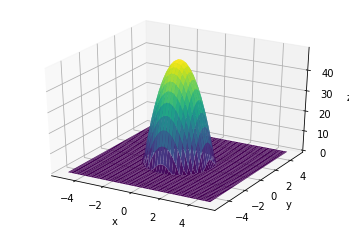

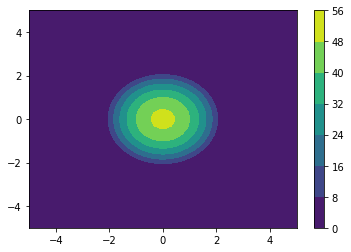

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def nu(x, y):
    return max(0,(-10*((x**2)+(y**2)))+50)

Lx = 10
Ly = 10

Nx = 50
Ny = 50

D = 1

x = np.linspace(-5,5,Nx) #for plot purpose
y = np.linspace(-5,5,Ny) #for plot purpose
X,Y = np.meshgrid(x,y)
dx =  Lx / Nx
dy = Ly / Ny
print("dx = ",dx)
print("dy = ",dy)

T =  101
Tfin =  0.5 
dt = Tfin/(T-1)
print("dt = ",dt)

#Initial condition
u = np.zeros((Nx,Ny))
u_n = np.zeros((Nx,Ny))

#setting initial condition u
for i in range(0,Nx):
    for j in range(0,Ny):
        u[i][j] = nu(x[i],y[j])

#print(rho)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

cp = plt.contourf(X, Y, u)
plt.colorbar(cp)
plt.show()

Proses loop

/Users/ismankrn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


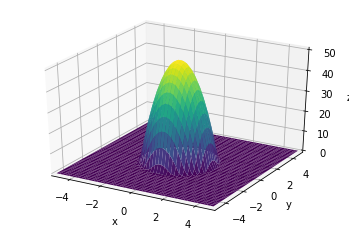

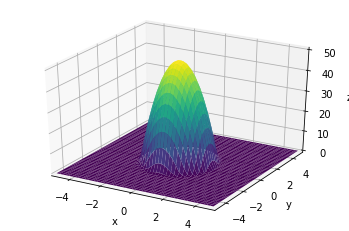

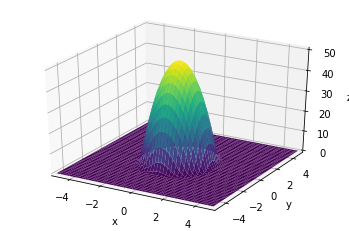

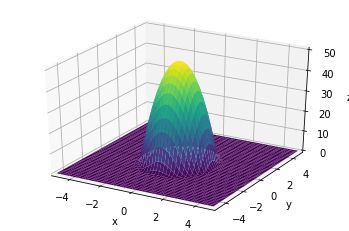

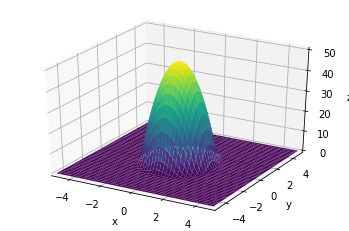

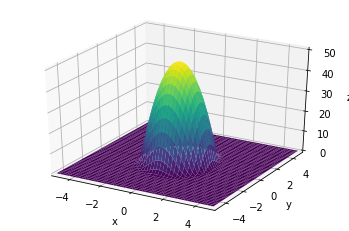

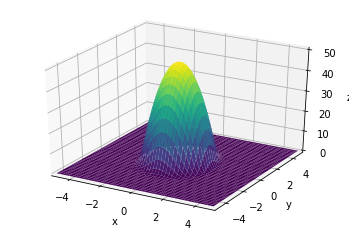

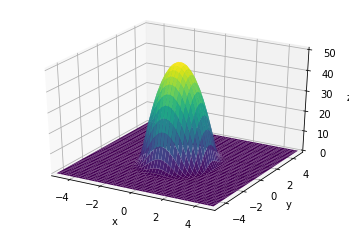

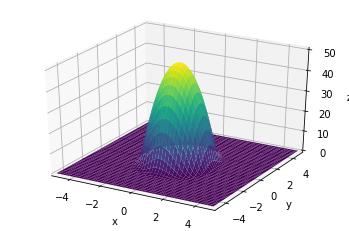

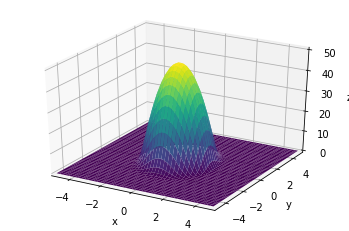

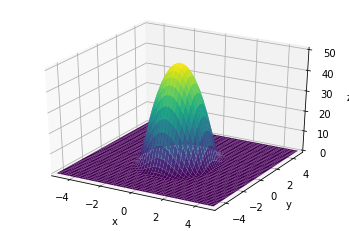

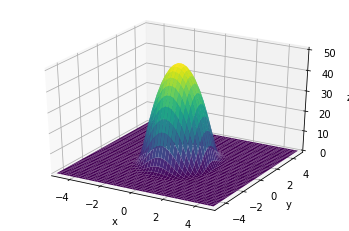

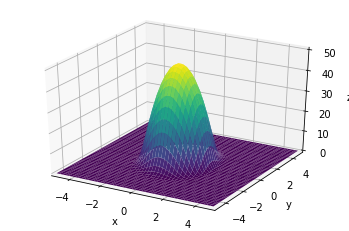

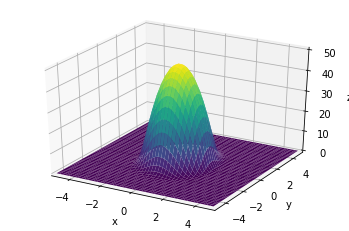

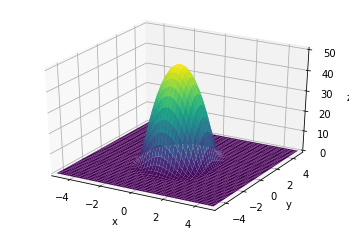

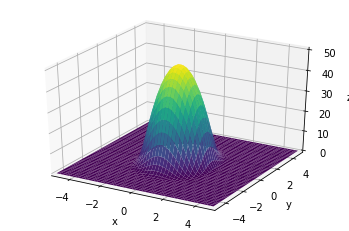

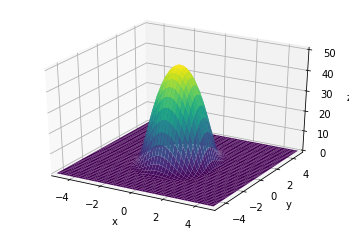

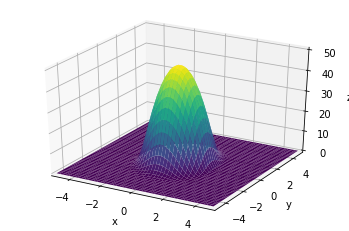

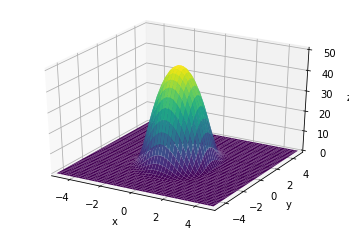

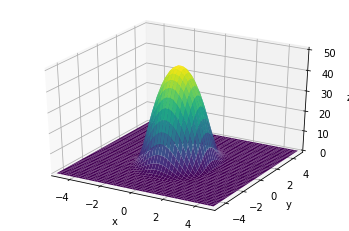

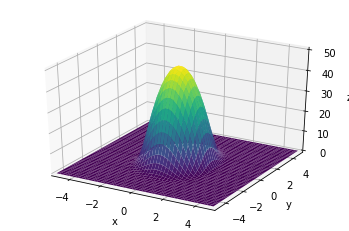

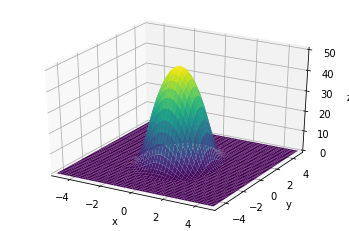

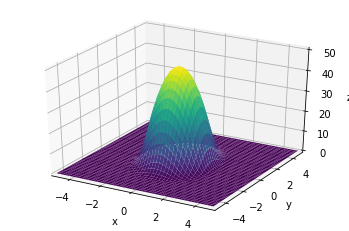

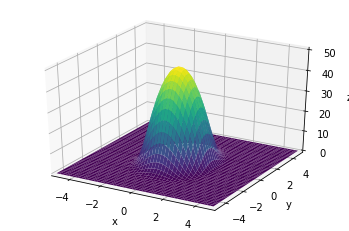

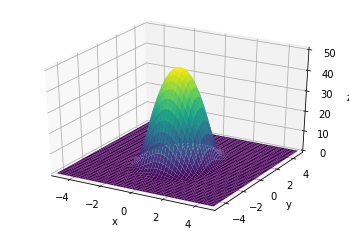

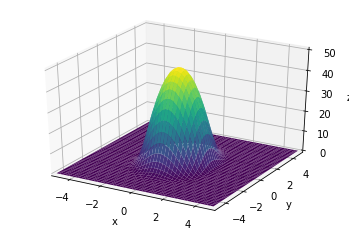

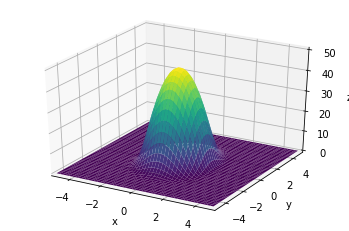

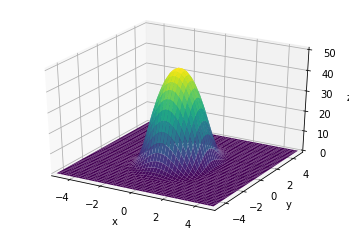

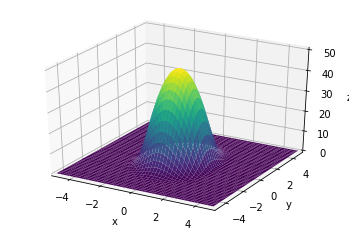

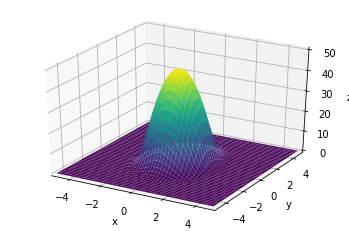

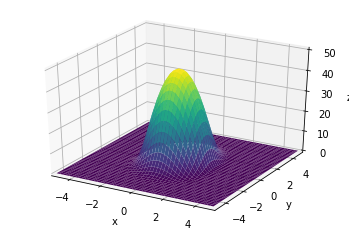

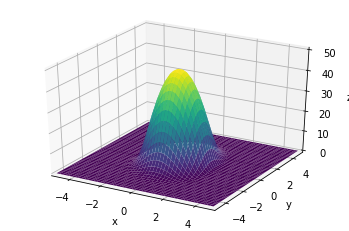

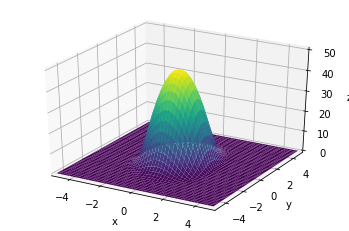

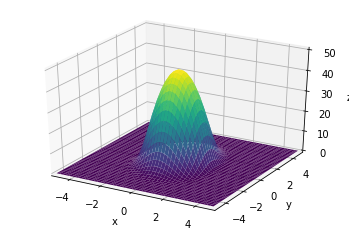

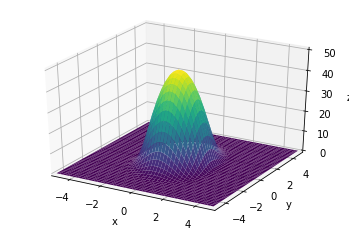

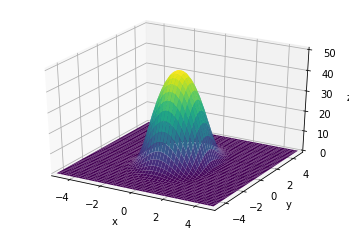

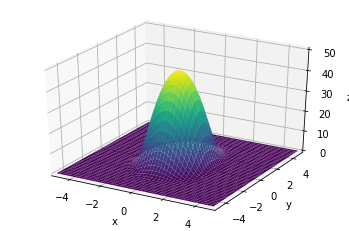

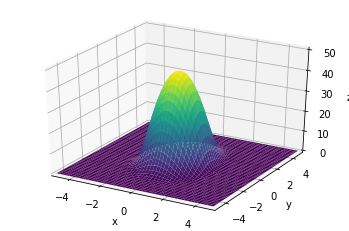

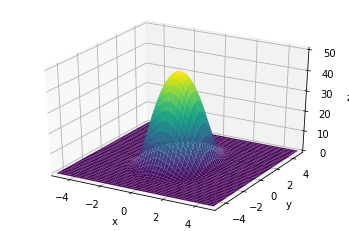

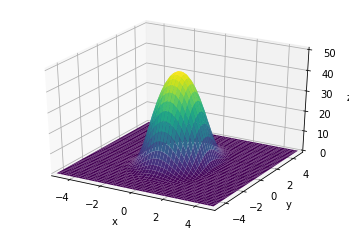

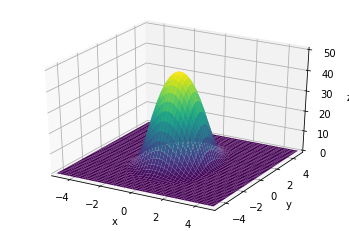

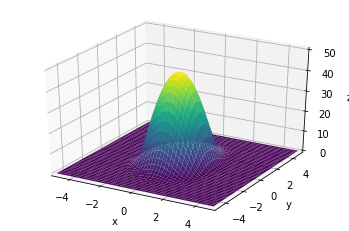

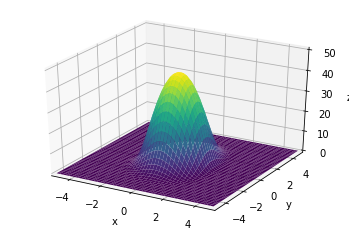

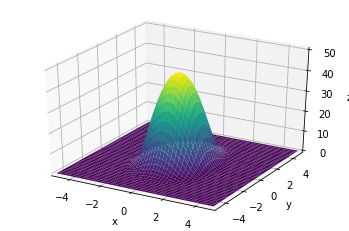

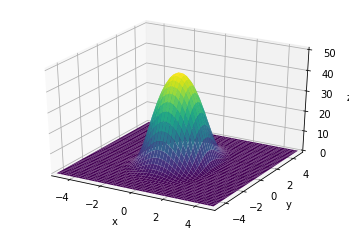

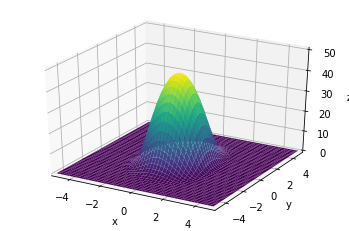

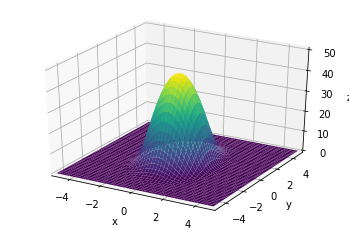

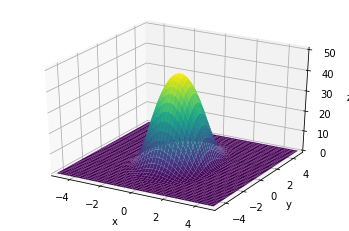

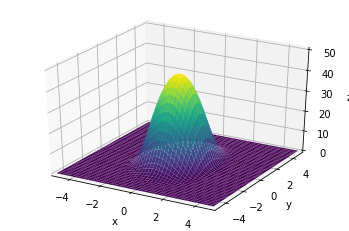

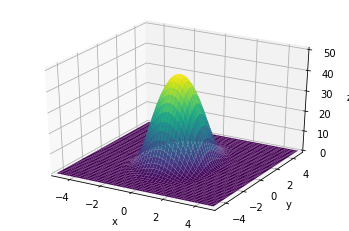

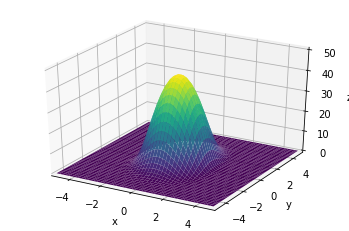

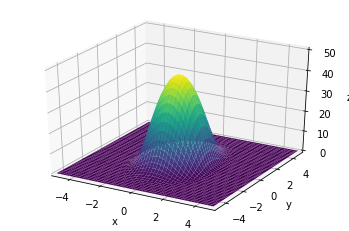

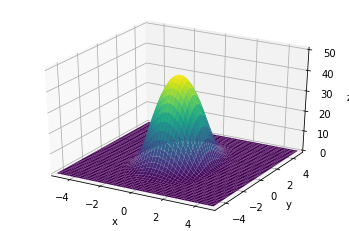

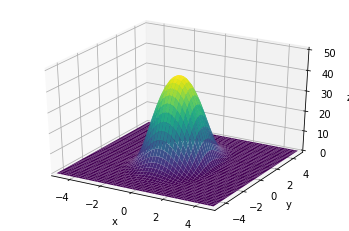

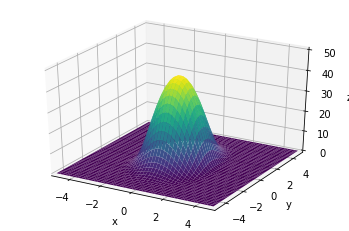

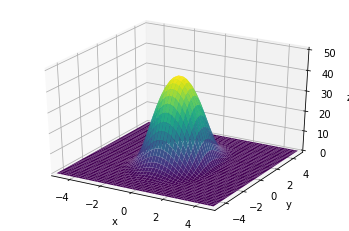

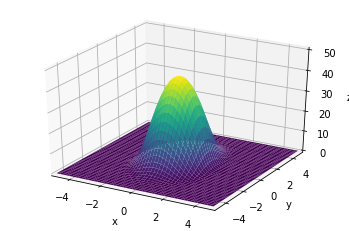

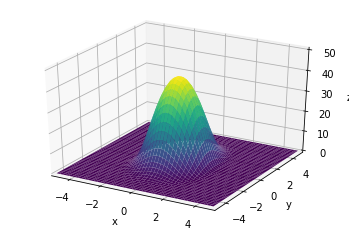

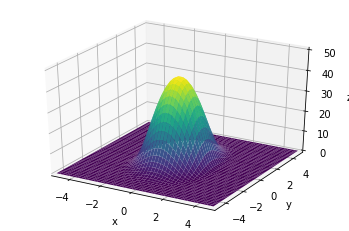

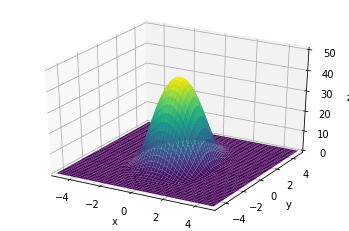

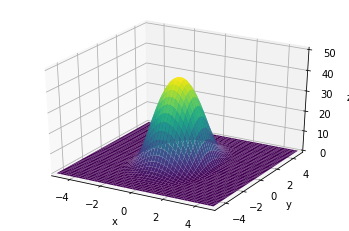

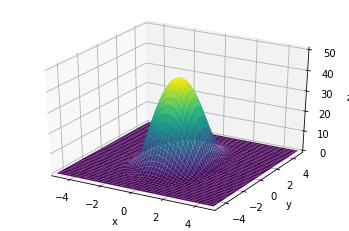

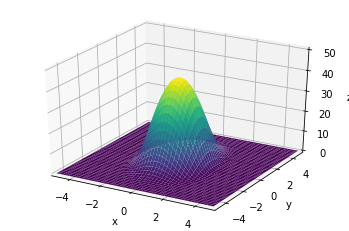

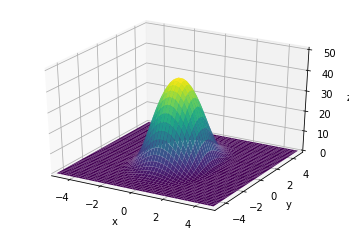

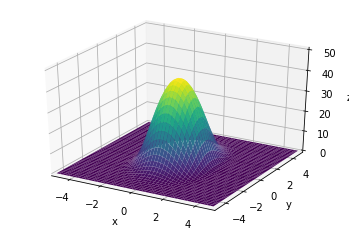

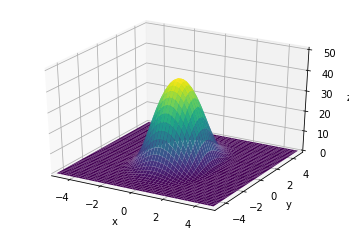

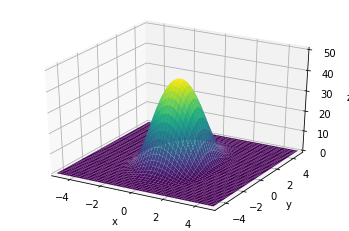

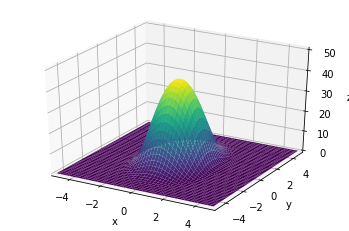

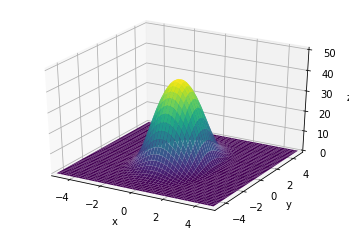

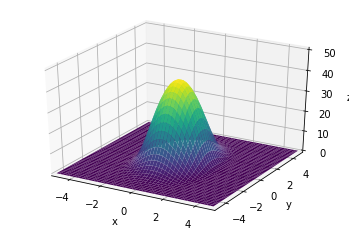

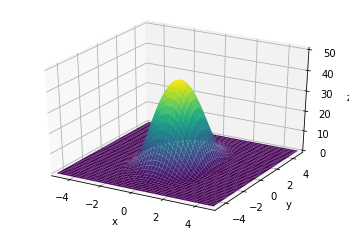

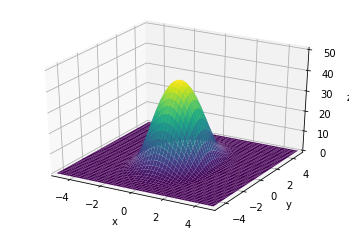

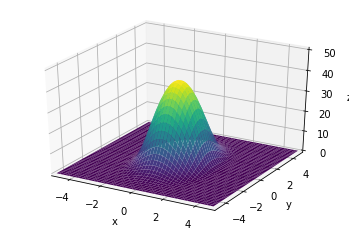

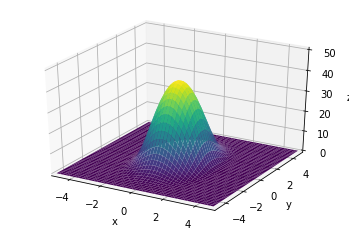

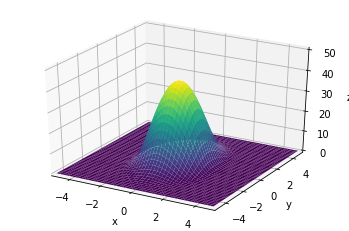

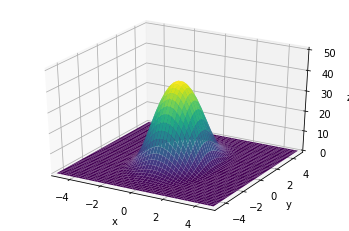

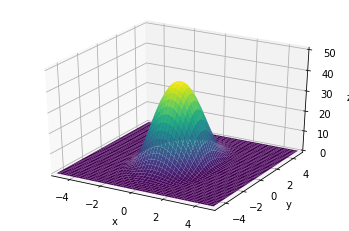

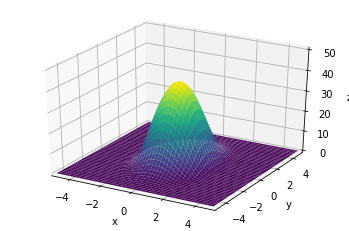

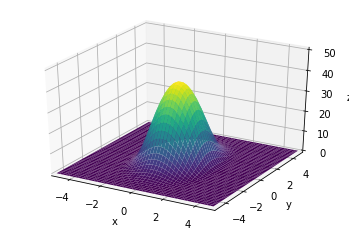

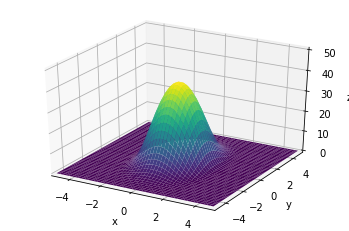

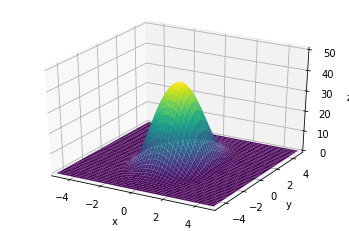

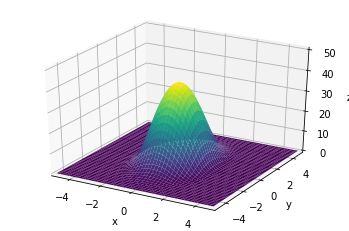

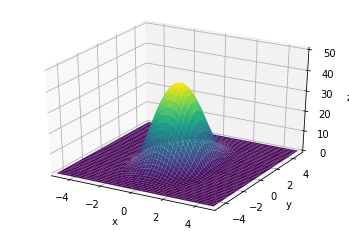

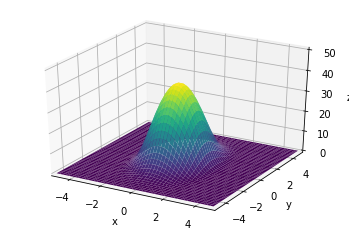

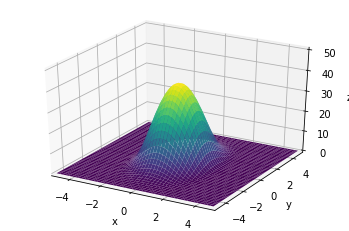

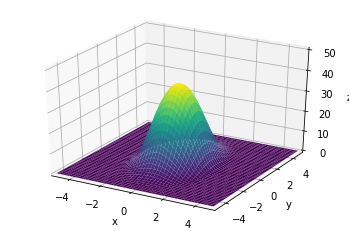

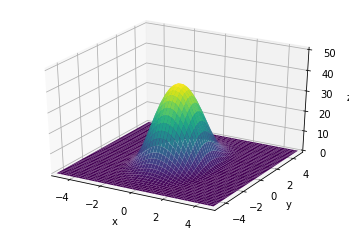

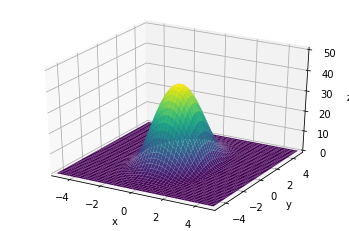

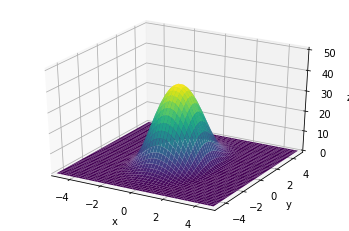

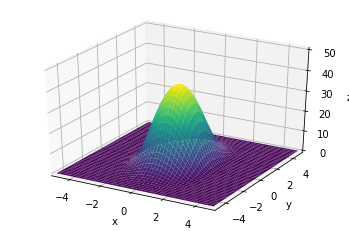

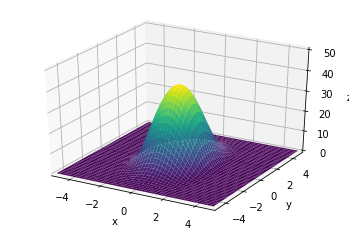

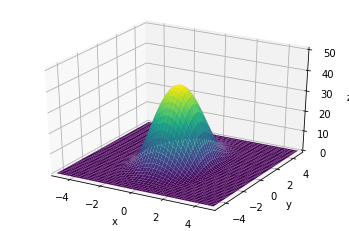

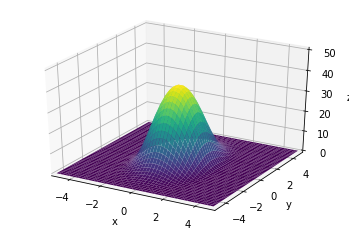

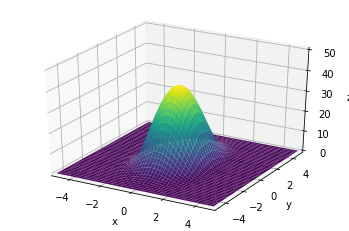

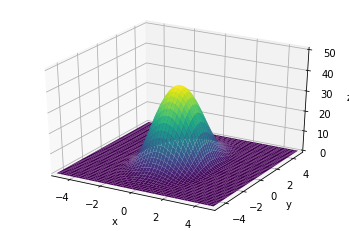

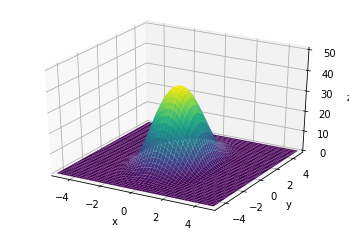

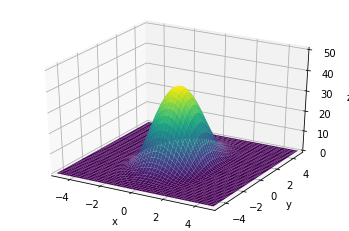

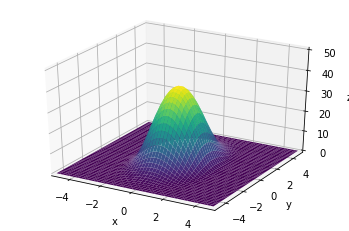

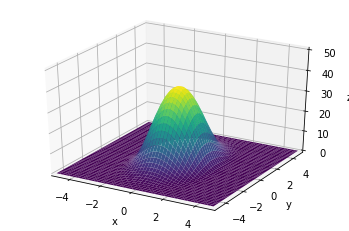

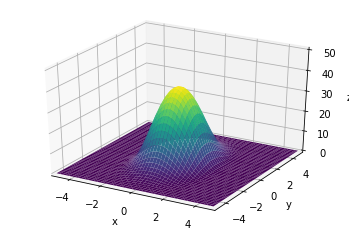

In [ ]:
time =0 
kk = 0
while(time <=Tfin):
    time = time + dt
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            u_n[i][j] = u[i][j] + (D*dt/dx**2)*((u[i+1][j]-2*u[i][j]+u[i-1][j]) + (D*dt/dy**2)*(u[i][j+1]-2*u[i][j]+u[i][j-1]))
   
  #boundary
    for i in range(0,Nx):
        u_n[i][0] = 0
        u_n[i][Ny-1] = 0
    for j in range(0,Ny):
        u_n[0][j] = 0
        u_n[Nx-1][j] = 0
    u = u_n

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(0,50))
    plt.savefig('./images/fig_{}.png'.format(kk), format='png', dpi=1000, bbox_inches="tight")
    kk += 1
# plt.show()

# cp = plt.contourf(X, Y, u)
# plt.colorbar(cp)
# plt.show()

### Persamaan Dimensi Tiga

Persamaan kalor dalam dimensi tiga ditulis sebagai berikut:

\begin{equation*}
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} +  \frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}

dimana u adalah temperatur pada posisi (x, y) dan waktu t, apalagi D
adalah persamaan konduktivitas.

Kemudian menggunakan metode beda hingga dari ekspansi Taylor, kami memiliki:

\begin{align}
&\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \mu \left( \frac{u^n_{i+1,j} -2u^n_{i,j} + u^n_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta z^2} \right)
\end{align}

Setup dan kondisi awal

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def nu(x, y):
    return max(0,(-10*((x**2)+(y**2)))+50)

Lx = 10
Ly = 10

Nx = 50
Ny = 50

D = 1

x = np.linspace(-5,5,Nx) #for plot purpose
y = np.linspace(-5,5,Ny) #for plot purpose
X,Y = np.meshgrid(x,y)
dx =  Lx / Nx
dy = Ly / Ny
print("dx = ",dx)
print("dy = ",dy)

T =  101
Tfin =  0.5 
dt = Tfin/(T-1)
print("dt = ",dt)

#Initial condition
u = np.zeros((Nx,Ny))
u_n = np.zeros((Nx,Ny))

#setting initial condition u
for i in range(0,Nx):
    for j in range(0,Ny):
        u[i][j] = nu(x[i],y[j])

#print(rho)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

cp = plt.contourf(X, Y, u)
plt.colorbar(cp)
plt.show()

Proses Loop

In [ ]:
time =0 
kk = 0
while(time <=Tfin):
    time = time + dt
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            u_n[i][j] = u[i][j] + (D*dt/dx**2)*((u[i+1][j]-2*u[i][j]+u[i-1][j]) + (D*dt/dy**2)*(u[i][j+1]-2*u[i][j]+u[i][j-1]))
   
  #boundary
    for i in range(0,Nx):
        u_n[i][0] = 0
        u_n[i][Ny-1] = 0
    for j in range(0,Ny):
        u_n[0][j] = 0
        u_n[Nx-1][j] = 0
    u = u_n

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(0,50))
    plt.savefig('./images/fig_{}.png'.format(kk), format='png', dpi=1000, bbox_inches="tight")
    kk += 1
# plt.show()

# cp = plt.contourf(X, Y, u)
# plt.colorbar(cp)
# plt.show()

### Rendering Collection of Figures to be Video



Akan dibahas dua contoh. Yang pertama membaca gambar dari sistem file dan membuat video. Contoh kedua membuat video langsung dari array numpy yang dihasilkan secara terprogram.

Untuk membuat video dari Array Gambar, ikuti urutan langkah-langkah di bawah ini.

1. Inisialisasi Video Writer dengan item berikut ditentukan.
  * Nama File Output Video
  * Kode fourcc yang menentukan codec
  * Jumlah Frames per Second
  * Ukuran Frame Video
2. Tulis masing-masing image array gambar ke obyek *Video Writer*.
3. Release dari *Video Writer*.

Contoh 1: Buat Video dari Gambar dalam Folder

Dalam contoh ini, kita akan membaca gambar, yang ada di folder, satu per satu. Kemudian kita akan menggunakan Video Writer untuk menulis setiap gambar, dalam satu lingkaran, ke file output video.

In [ ]:
import cv2
import numpy as np
import glob

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for filename in glob.glob('./images/*.png'):
    img = cv2.imread(filename)
    out.write(img)

out.release()

* 'output_video.avi' adalah nama file output video.
* cv2.VideoWriter_fourcc (* 'DIVX') adalah codec-nya.
* 60 adalah jumlah frame per detik. Jadi, 60 gambar harus digunakan untuk membuat video berdurasi satu detik. Anda dapat mengubah nilai ini sesuai kebutuhan.
* frameSize = (500, 500) mendefinisikan lebar dan tinggi dari video keluaran.

Dalam program di atas, untuk loop membaca semua file .jpg satu per satu ke array numpy menggunakan cv2.imread (). Dan gambar *numpy array* ditulis ke file video menggunakan *Video Writer*.

Harap diperhatikan bahwa urutan gambar yang ditulis ke file video bergantung pada cara *glob* membaca file dari folder.

Anda dapat mengontrol urutan file yang Anda baca di loop, sehingga mengontrol urutan gambar di video.


Contoh 2: Buat Video dari Numpy Array

Dalam contoh ini, kita akan membuat *numpy array* Python. Kemudian akan menggunakannya

In [ ]:
import cv2
import numpy as np
 

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for i in range(0,255):
    img = np.ones((500, 500, 3), dtype=np.uint8)*i
    out.write(img)

out.release()

# Thank you for completing this lab!